<a href="https://colab.research.google.com/github/Arpitabagdawat/Fake-news-detection/blob/main/fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
fake = pd.read_csv("/content/Fake.csv", engine='python',on_bad_lines='skip')
fake.head(2)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"


In [ ]:
true = pd.read_csv("/content/True.csv", engine='python', on_bad_lines='skip')
true.head(2)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"


In [ ]:
# add labels
fake["label"]=1 #fake=1
true["label"]=0 #true=0

In [ ]:
# Merge and shuffle
data = pd.concat([fake, true]).sample(frac=1).reset_index(drop=True)
data.head()

,title,text,subject,date,label
0,Trump would want Moore to step aside if sexual...,"DANANG, Vietnam (Reuters) - U.S. President Don...",politicsNews,"November 10, 2017",0
1,"House, Senate Republicans face challenge over ...",WASHINGTON (Reuters) - U.S. Republicans in Con...,politicsNews,"December 5, 2017",0
2,Milo Yiannopoulos Tells Aussies To Vote Again...,Milo Yiannopoulos will do anything to keep his...,News,"October 26, 2017",1
3,OOPS: Trump Judicial Nominee Didn’t Tell Cong...,This is a major conflict of interest that shou...,News,"November 13, 2017",1
4,Trump And John Kelly Just Got RIPPED APART By...,Donald Trump and his disgraceful team deserve ...,News,"October 21, 2017",1


In [ ]:
# Save final dataset
data.to_csv("news.csv",index=False)

print(data.head())

                                               title  \
0  Trump would want Moore to step aside if sexual...   
1  House, Senate Republicans face challenge over ...   
2   Milo Yiannopoulos Tells Aussies To Vote Again...   
3   OOPS: Trump Judicial Nominee Didn’t Tell Cong...   
4   Trump And John Kelly Just Got RIPPED APART By...   

                                                text       subject  \
0  DANANG, Vietnam (Reuters) - U.S. President Don...  politicsNews   
1  WASHINGTON (Reuters) - U.S. Republicans in Con...  politicsNews   
2  Milo Yiannopoulos will do anything to keep his...          News   
3  This is a major conflict of interest that shou...          News   
4  Donald Trump and his disgraceful team deserve ...          News   

                 date  label  
0  November 10, 2017       0  
1   December 5, 2017       0  
2    October 26, 2017      1  
3   November 13, 2017      1  
4    October 21, 2017      1  


**BASIC EDA**

In [ ]:
df = pd.read_csv("/content/news.csv")
df.head()

,title,text,subject,date,label
0,Trump would want Moore to step aside if sexual...,"DANANG, Vietnam (Reuters) - U.S. President Don...",politicsNews,"November 10, 2017",0
1,"House, Senate Republicans face challenge over ...",WASHINGTON (Reuters) - U.S. Republicans in Con...,politicsNews,"December 5, 2017",0
2,Milo Yiannopoulos Tells Aussies To Vote Again...,Milo Yiannopoulos will do anything to keep his...,News,"October 26, 2017",1
3,OOPS: Trump Judicial Nominee Didn’t Tell Cong...,This is a major conflict of interest that shou...,News,"November 13, 2017",1
4,Trump And John Kelly Just Got RIPPED APART By...,Donald Trump and his disgraceful team deserve ...,News,"October 21, 2017",1


In [ ]:
df.shape

(1636, 5)

In [ ]:
df.columns

Index(['title', 'text', 'subject', 'date', 'label'], dtype='object')

In [ ]:
df['label'].value_counts()

,count
label,
0,828
1,808


In [ ]:
df.head()

,title,text,subject,date,label
0,Trump would want Moore to step aside if sexual...,"DANANG, Vietnam (Reuters) - U.S. President Don...",politicsNews,"November 10, 2017",0
1,"House, Senate Republicans face challenge over ...",WASHINGTON (Reuters) - U.S. Republicans in Con...,politicsNews,"December 5, 2017",0
2,Milo Yiannopoulos Tells Aussies To Vote Again...,Milo Yiannopoulos will do anything to keep his...,News,"October 26, 2017",1
3,OOPS: Trump Judicial Nominee Didn’t Tell Cong...,This is a major conflict of interest that shou...,News,"November 13, 2017",1
4,Trump And John Kelly Just Got RIPPED APART By...,Donald Trump and his disgraceful team deserve ...,News,"October 21, 2017",1


In [ ]:
# import libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# first time run karna h to yeh downloads chahiye
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('wordnet')

stop = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# define clean_text function
def clean_text(text):
    text = str(text).lower()                       # lowercase
    text = re.sub(r'http\S+','', text)            # remove URLs
    text = re.sub(r'<.*?>','', text)              # remove HTML
    text = re.sub(r'[^a-z\s]','', text)           # remove non-letters
    tokens = nltk.word_tokenize(text)             # split into words
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop and len(t)>1]
    return " ".join(tokens)

In [ ]:
# apply cleaning
df['clean_text'] = df['title'].fillna('') + " " + df['text'].fillna('')
df['clean_text'] = df['clean_text'].apply(clean_text)
df.head()

,title,text,subject,date,label,clean_text
0,Trump would want Moore to step aside if sexual...,"DANANG, Vietnam (Reuters) - U.S. President Don...",politicsNews,"November 10, 2017",0,trump would want moore step aside sexual misco...
1,"House, Senate Republicans face challenge over ...",WASHINGTON (Reuters) - U.S. Republicans in Con...,politicsNews,"December 5, 2017",0,house senate republican face challenge corpora...
2,Milo Yiannopoulos Tells Aussies To Vote Again...,Milo Yiannopoulos will do anything to keep his...,News,"October 26, 2017",1,milo yiannopoulos tell aussie vote marriage eq...
3,OOPS: Trump Judicial Nominee Didn’t Tell Cong...,This is a major conflict of interest that shou...,News,"November 13, 2017",1,oops trump judicial nominee didnt tell congres...
4,Trump And John Kelly Just Got RIPPED APART By...,Donald Trump and his disgraceful team deserve ...,News,"October 21, 2017",1,trump john kelly got ripped apart medal honor ...


In [ ]:
# import libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# train test split
X = df['clean_text']   # input features (cleaned text)
y = df['label']        # target labels (0 = real, 1 = fake)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (1308,)
Test size: (328,)


In [ ]:
# vectorization(convert text into numbers)
tfidf = TfidfVectorizer(max_features=5000)   # max 5000 words
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

print("Vectorized shape:", X_train_vec.shape)


Vectorized shape: (1308, 5000)


In [ ]:
# import models % metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# train the model
model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)

LogisticRegression(max_iter=200)

In [ ]:
# Predictions
y_pred = model.predict(X_test_vec)

In [ ]:
# Evluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9908536585365854

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       170
           1       0.99      0.99      0.99       158

    accuracy                           0.99       328
   macro avg       0.99      0.99      0.99       328
weighted avg       0.99      0.99      0.99       328


Confusion Matrix:
 [[168   2]
 [  1 157]]


**Prediction on new text**

In [ ]:
# test with a single news
sample = ["Breaking news: Scientists discover a new planet in our solar system!"]

# clean + vectorize
sample_clean = [clean_text(sample[0])]
sample_vec = tfidf.transform(sample_clean)

# predict
pred = model.predict(sample_vec)[0]

if pred == 1:
    print("🚨 This looks like FAKE news!")
else:
    print("✅ This looks like REAL news!")

🚨 This looks like FAKE news!


In [ ]:
# Save Model (optional but good for project)
# save model &  vectorizer
import pickle

pickle.dump(model, open("fake_news_model.pkl", "wb"))
pickle.dump(tfidf, open("vectorizer.pkl", "wb"))

In [ ]:
# Dataset balance chech & balancing
# check current distribution
import matplotlib.pyplot as plt


df['label'].value_counts()

,count
label,
0,828
1,808


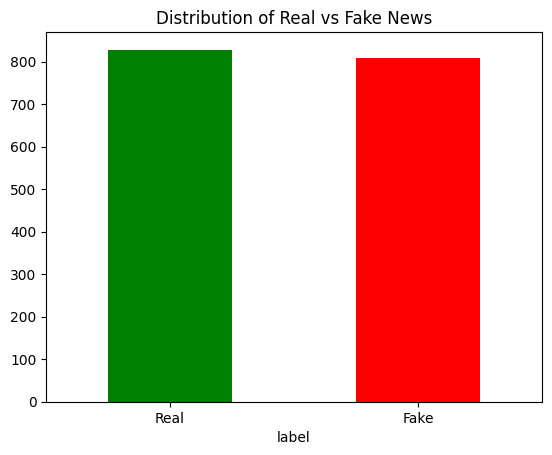

In [ ]:
df['label'].value_counts().plot(kind='bar', color=['green','red'])
plt.title("Distribution of Real vs Fake News")
plt.xticks([0,1], ['Real','Fake'], rotation=0)
plt.show()

**Balance dataset**

In [ ]:

# Separate real & fake
real = df[df['label']==0]
fake = df[df['label']==1]

# Undersample fake to match real
if len(real) < len(fake):
    fake = fake.sample(len(real), random_state=42)
else:
    real = real.sample(len(fake), random_state=42)

# Merge again
df_balanced = pd.concat([real, fake]).sample(frac=1, random_state=42).reset_index(drop=True)

print(df_balanced['label'].value_counts())

label
0    808
1    808
Name: count, dtype: int64


*Retrain model*

In [ ]:
X = df_balanced['clean_text']
y = df_balanced['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

# Train Logistic Regression again
model = LogisticRegression(max_iter=200)
model.fit(X_train_vec, y_train)

# Evaluate
y_pred = model.predict(X_test_vec)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9907407407407407

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       163
           1       0.99      0.99      0.99       161

    accuracy                           0.99       324
   macro avg       0.99      0.99      0.99       324
weighted avg       0.99      0.99      0.99       324



**Test both real & fake**

In [ ]:
samples = [
    "Donald Trump met with world leaders at the White House.",   # Real
    "Hillary Clinton sold weapons to ISIS, leaked emails reveal." # Fake
]

for s in samples:
    sample_clean = [clean_text(s)]
    sample_vec = tfidf.transform(sample_clean)
    pred = model.predict(sample_vec)[0]
    print(s)
    print("🚨 Fake" if pred==1 else "✅ Real")
    print("------")

Donald Trump met with world leaders at the White House.
🚨 Fake
------
Hillary Clinton sold weapons to ISIS, leaked emails reveal.
🚨 Fake
------
